In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

In [2]:
df=pd.read_csv('D:/data_science/data_analysis/medical_insurance_dataset.csv',header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520


In [5]:
headers = ["age", "gender", "bmi", "no_of_children", "smoker", "region", "charges"]
df.columns = headers
df

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
2767,47,1,45.320,1,0,4,8569.86180
2768,21,1,34.600,0,0,3,2020.17700
2769,19,2,26.030,1,1,1,16450.89470
2770,23,2,18.715,0,0,1,21595.38229


In [9]:
missing_data=df.isnull()
missing_data

,age,gender,bmi,no_of_children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
2767,False,False,False,False,False,False,False
2768,False,False,False,False,False,False,False
2769,False,False,False,False,False,False,False
2770,False,False,False,False,False,False,False


In [7]:
# replacing ? to NaN
df.replace('?',np.nan,inplace=True)

In [15]:
#No of missing values
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print('')

age
False    2768
True        4
Name: age, dtype: int64

gender
False    2772
Name: gender, dtype: int64

bmi
False    2772
Name: bmi, dtype: int64

no_of_children
False    2772
Name: no_of_children, dtype: int64

smoker
False    2765
True        7
Name: smoker, dtype: int64

region
False    2772
Name: region, dtype: int64

charges
False    2772
Name: charges, dtype: int64



In [23]:
#handling missing values
mean=df['age'].astype(float).mean(axis=0)
mean

39.10982658959538

In [24]:
df['age'].replace(np.nan,mean, inplace=True)

In [25]:
is_smoker=df['smoker'].value_counts().idxmax()
df['smoker'].replace(np.nan,is_smoker,inplace=True)

In [26]:
## update the datatype
df[['age','smoker']]=df[['age','smoker']].astype('int')

In [27]:
#rounding of the charges to 2 decimal places
df['charges']=np.round(df['charges'],2)

In [29]:
df.head(10)

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92
1,18,2,33.770,1,0,4,1725.55
2,28,2,33.000,3,0,4,4449.46
3,33,2,22.705,0,0,1,21984.47
4,32,2,28.880,0,0,1,3866.86
5,31,1,25.740,0,0,4,3756.62
6,46,1,33.440,1,0,4,8240.59
7,37,1,27.740,3,0,1,7281.51
8,37,2,29.830,2,0,2,6406.41
9,60,1,25.840,0,0,1,28923.14


## EDA

(0.0, 66902.85800000001)

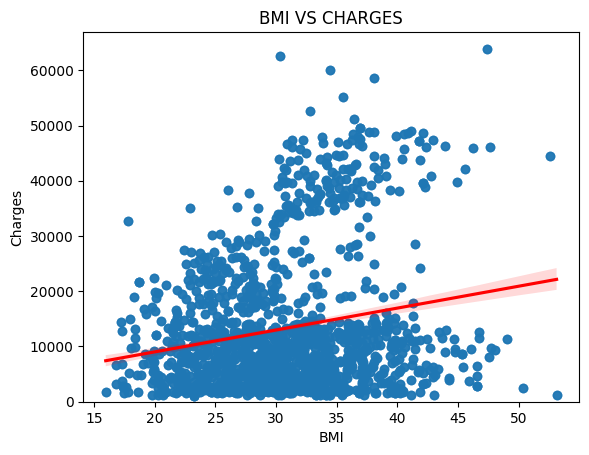

In [32]:
#Regression plot
sns.regplot(x='bmi',y='charges',data=df,line_kws={'color':'red'})
plt.title('BMI VS CHARGES')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.ylim(0,)

<Axes: xlabel='smoker', ylabel='charges'>

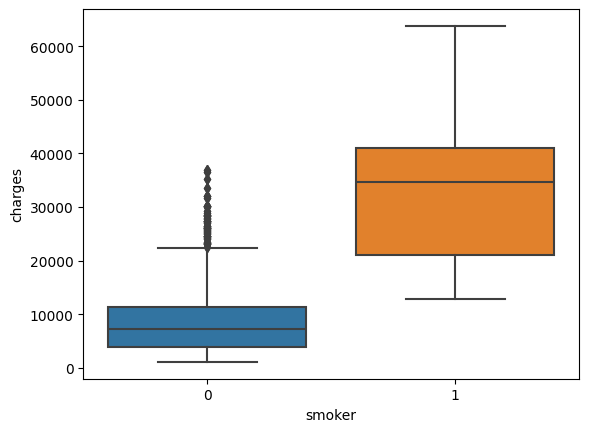

In [33]:
#Box plot for smoker vs charges
sns.boxplot(x='smoker',y='charges',data=df)

In [35]:
## cor-relation value for the dataset
df.corr()

,age,gender,bmi,no_of_children,smoker,region,charges
age,1.000000,-0.026046,0.113048,0.037574,-0.023286,-0.007167,0.298624
gender,-0.026046,1.000000,0.042924,0.016020,0.082326,0.022213,0.062837
bmi,0.113048,0.042924,1.000000,-0.001492,0.011489,0.271119,0.199846
no_of_children,0.037574,0.016020,-0.001492,1.000000,0.006362,-0.025717,0.066442
smoker,-0.023286,0.082326,0.011489,0.006362,1.000000,0.054077,0.788783
region,-0.007167,0.022213,0.271119,-0.025717,0.054077,1.000000,0.054058
charges,0.298624,0.062837,0.199846,0.066442,0.788783,0.054058,1.000000


## Model development

In [40]:
lr=LinearRegression()

lr.fit(df[['smoker']],df['charges'])
r2=lr.score(df[['smoker']],df['charges'])
r2

0.6221791733924185

In [41]:
lr1=LinearRegression()
z=df[['age','gender','bmi','no_of_children','smoker','region',]]
lr1.fit(z,df['charges'])
r_score=lr1.score(z,df['charges'])

In [42]:
r_score

0.7504083820289634

## Pipe line

In [49]:
input=[('scale',StandardScaler()),('polynomial',PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [50]:
pipe=Pipeline(input)
z=z.astype(float)

In [51]:
pipe.fit(z,df['charges'])

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [55]:
yhat=pipe.predict(z)

In [56]:
print(r2_score(df['charges'],yhat))

0.8452545462417698


as we can see that creating pipeline improves the R squared score

## Model Refinement

In [59]:
x_data=df.drop('charges',axis=1)
y_data=df['charges']

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.20,random_state=1)

In [61]:
RR=Ridge(alpha=0.1)
RR

Ridge(alpha=0.1)

In [62]:
RR.fit(x_train,y_train)

Ridge(alpha=0.1)

In [64]:
y_hat=RR.predict(x_test)

In [65]:
#r2 score for ridge regression model
r2score=r2_score(y_test,y_hat)
r2score

0.6760807731582406

In [66]:
#polynomial regression

In [68]:
pr=PolynomialFeatures(degree=2)


In [71]:
x_train_pr=pr.fit_transform(x_train)
x_test_pr=pr.fit_transform(x_test)
RR.fit(x_train_pr,y_train)
yhat1=RR.predict(x_test_pr)

In [72]:
# Best r2 score from the above is:
r2_score(y_test,yhat1)


0.7835631107608138